In [8]:
!pip install SentimentIntensityAnalyzer
!pip install chart_studio
!pip install TextBlob
!pip install plotly
!pip install WordCloud
!pip install cufflinks

ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: none)
ERROR: No matching distribution found for SentimentIntensityAnalyzer


In [9]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import nltk
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', None)

In [10]:
import pandas as pd

# Load the datasets
try:
    df1 = pd.read_csv("amazon_reviews.csv")
    df2 = pd.read_csv("amazon.csv")
    print("Datasets loaded successfully.")
except Exception as e:
    print(f"Error loading datasets: {e}")

# Concatenate the datasets
try:
    df_ = pd.concat([df1, df2], ignore_index=True)
    print("Datasets concatenated successfully.")
except Exception as e:
    print(f"Error concatenating datasets: {e}")

# Display first few rows of the concatenated dataset
if 'df_' in locals():
    print("First few rows of the concatenated dataset:")
    print(df_.head())
else:
    print("Concatenated dataset is not available due to an error.")


Datasets loaded successfully.
Datasets concatenated successfully.
First few rows of the concatenated dataset:
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                  

In [11]:
import pandas as pd

# Load the datasets
try:
    df1 = pd.read_csv("amazon_reviews.csv")
    df2 = pd.read_csv("amazon.csv")
    print("Datasets loaded successfully.")
except Exception as e:
    print(f"Error loading datasets: {e}")

# Print the column names to find a suitable merge key
print("Columns in amazon_reviews.csv:")
print(df1.columns)

print("Columns in amazon.csv:")
print(df2.columns)

# Merge the datasets based on the actual common column name
try:
    df_ = pd.merge(df1, df2, on='reviewID', how='inner')  # Replace 'reviewID' with the actual key column name
    print("Datasets merged successfully.")
except Exception as e:
    print(f"Error merging datasets: {e}")

# Display first few rows of the merged dataset if merge was successful
if 'df_' in locals():
    print("First few rows of the merged dataset:")
    print(df_.head())
else:
    print("Merged dataset is not available due to an error.")


Datasets loaded successfully.
Columns in amazon_reviews.csv:
Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')
Columns in amazon.csv:
Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')
Error merging datasets: 'reviewID'
First few rows of the merged dataset:
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.

In [12]:
df = df_.copy()

In [13]:
df = df.sort_values("wilson_lower_bound", ascending=False)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
6946,"Hyoun Kim ""Faluzure""",5.0,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
2031,"Hyoun Kim ""Faluzure""",5.0,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,I have tested dozens of SDHC and micro-SDHC ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
8364,NLee the Engineer,5.0,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
9127,SkincareCEO,1.0,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139


In [14]:
import pandas as pd
import numpy as np

def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print(" SHAPE ".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))

    print(" TYPES ".center(82, '~'))
    print(df.dtypes)
    print("".center(82, '~'))
    
    print(missing_values_analysis(df))
    
    print(' DUPLICATED VALUES '.center(83, '~'))
    print(df.duplicated().sum())

    print(" QUANTILES ".center(82, '~'))
    # Select only numeric columns for quantile calculation
    numeric_cols = df.select_dtypes(include=[np.number])
    print(numeric_cols.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 9830
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Total Missing Values  Ratio
reviewerName                     2   0.02
reviewText                       2   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DUPLICATED VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ QUANTILES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99    

In [15]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})

    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4595
2,reviewTime,1380
3,day_diff,690
4,wilson_lower_bound,79
5,score_average_rating,47
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [16]:
# categorical variable analysis ---> overall

constraints = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(), 
                          x = [str(i) for i in df[column_name].value_counts().index], 
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = constraints,
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)
    
    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=constraints)),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    
    iplot(fig)

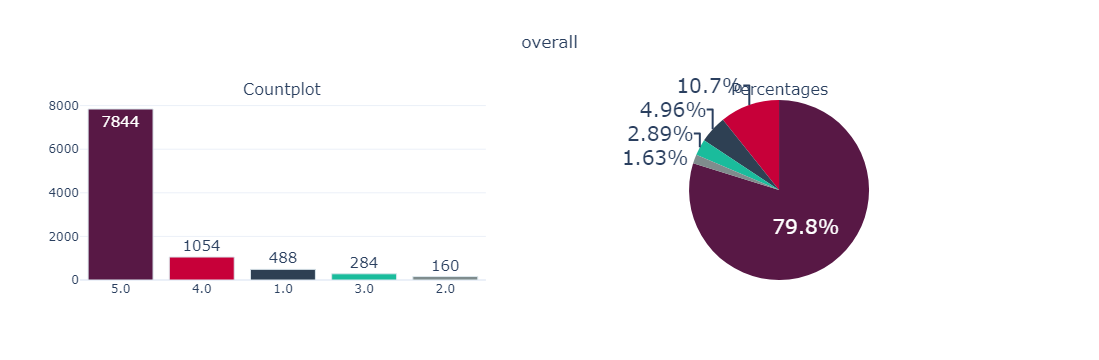

In [17]:
categorical_variable_summary(df,'overall')

In [18]:
# sample for cleaning
df.reviewText.head()

6946    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
8364    I have tested dozens of SDHC and micro-SDHC ca...
9127    NOTE:  please read the last update (scroll to ...
Name: reviewText, dtype: object

In [19]:
example_review = df.reviewText[2031]
example_review

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [20]:
# we clean it from punctuation and numbers - using regex. {Regular expression}
example_review = re.sub("[^a-zA-Z]",' ',example_review)
example_review

'   UPDATE               So my lovely wife bought me a Samsung Galaxy Tab   for Father s Day and I ve been loving it ever since   Just as other with Samsung products  the Galaxy Tab   has the ability to add a microSD card to expand the memory on the device   Since it s been over a year  I decided to do some more research to see if SanDisk offered anything new   As of            their product lineup for microSD cards from worst to best  performance wise  are the as follows SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow  the difference between all of these cards are simply the speed in which you can read write data to the card   Yes  the published rating of most all these cards  except the SanDisk regular  are Class    UHS I but that s just a rating    Actual real world performance does get better with each model  but with faster cards come more expensive prices   Since Amazon doesn t carry the Ultra PLUS model of microSD card  I had to do

In [21]:
example_review = example_review.lower().split()

In [22]:
example_review

['update',
 'so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 'for',
 'father',
 's',
 'day',
 'and',
 'i',
 've',
 'been',
 'loving',
 'it',
 'ever',
 'since',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products',
 'the',
 'galaxy',
 'tab',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device',
 'since',
 'it',
 's',
 'been',
 'over',
 'a',
 'year',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new',
 'as',
 'of',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 'performance',
 'wise',
 'are',
 'the',
 'as',
 'follows',
 'sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow',
 'the',
 'difference',
 'between',
 'all',
 'of',
 'these',
 'cards',
 'are',
 'simply',
 

In [23]:
rt = lambda x: re.sub("[^a-zA-Z]",' ',str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head(10)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
6946,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
8364,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
9127,SkincareCEO,1.0,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577
5232,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109
9587,Twister,5.0,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [24]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming 'df' is your DataFrame and 'reviewText' is the column to analyze

# Sentiment analysis using TextBlob
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda text: pd.Series(TextBlob(text).sentiment))

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Define a function to classify sentiment using VADER
def classify_sentiment(text):
    score = vader_analyzer.polarity_scores(text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    
    if neg > pos:
        return "Negative"
    elif pos > neg:
        return "Positive"
    else:
        return "Neutral"

# Apply the function to classify sentiment for each review
df['sentiment'] = df['reviewText'].apply(classify_sentiment)

# Print the first few rows to verify
print(df.head())


              reviewerName  overall  \
6946  Hyoun Kim "Faluzure"      5.0   
2031  Hyoun Kim "Faluzure"      5.0   
3449     NLee the Engineer      5.0   
8364     NLee the Engineer      5.0   
9127           SkincareCEO      1.0   

                                             reviewText  reviewTime  day_diff  \
6946     update               so my lovely wife boug...  05-01-2013       702   
2031     update               so my lovely wife boug...  2013-01-05       702   
3449  i have tested dozens of sdhc and micro sdhc ca...  2012-09-26       803   
8364  i have tested dozens of sdhc and micro sdhc ca...  26-09-2012       803   
9127  note   please read the last update  scroll to ...  08-05-2013       579   

      helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
6946         1952          68        2020                1884   
2031         1952          68        2020                1884   
3449         1428          77        1505                1351   
8364         1428 

In [25]:
# 20 Identifying the interpretation, now we can include the positive, negative and neutral status of the comments.

df[df["sentiment"] == "Positive"].sort_values("wilson_lower_bound", ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
6946,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
8364,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
9127,SkincareCEO,1.0,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive


In [26]:
# Let's see if we have an unbalanced data problem
categorical_variable_summary(df,'sentiment')

In [27]:
# Let's see if there is an imbalance in the scoring
df.groupby(["sentiment"])[['overall']].mean()

,overall
sentiment,
Negative,3.608696
Neutral,4.689781
Positive,4.738304
